In [9]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

In [10]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [11]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [12]:
# Get only the cubes that have our line of interest in them
mol_tag = 46010 # 46515
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

    FREQ     ERR    LGINT   DR  ELO   GUP  TAG   QNFMT   QN'     QN"  
    MHz      MHz   MHz nm2     1 / cm                                 
----------- ------ ------- --- ------ --- ------ ----- ------- -------
 115153.935   0.03 -3.3824   2 3.0738   8 -46010   814 3 1-1 4 2 1 1 3
 115156.812   0.02  -3.583   2  3.075   6 -46010   814 3 1-1 3 2 1 1 2
 115162.982   0.03 -3.8084   2 3.0757   4 -46010   814 3 1-1 2 2 1 1 1
115185.3068 0.0196 -4.3032   2  3.075   4  46010   814 3 1-1 2 2 1 1 2
115191.4473 0.0234 -4.3032   2 3.0738   6  46010   814 3 1-1 3 2 1 1 3
115219.9278  0.037 -5.6834   2 3.0738   4  46010   814 3 1-1 2 2 1 1 3
115443.2414 0.0151 -5.6805   2 3.1026   4  46010   814 3 1 1 2 2 1-1 3
 115489.412   0.01 -4.3003   2 3.1026   6 -46010   814 3 1 1 3 2 1-1 3
 115524.603  0.035 -4.3003   2 3.0999   4 -46010   814 3 1 1 2 2 1-1 2
 115556.253  0.015 -3.3795   2 3.1026   8 -46010   814 3 1 1 4 2 1-1 3
 115570.763  0.025 -3.5801   2 3.0999   6 -46010   814 3 1 1 3 2 1-1 2
 11557

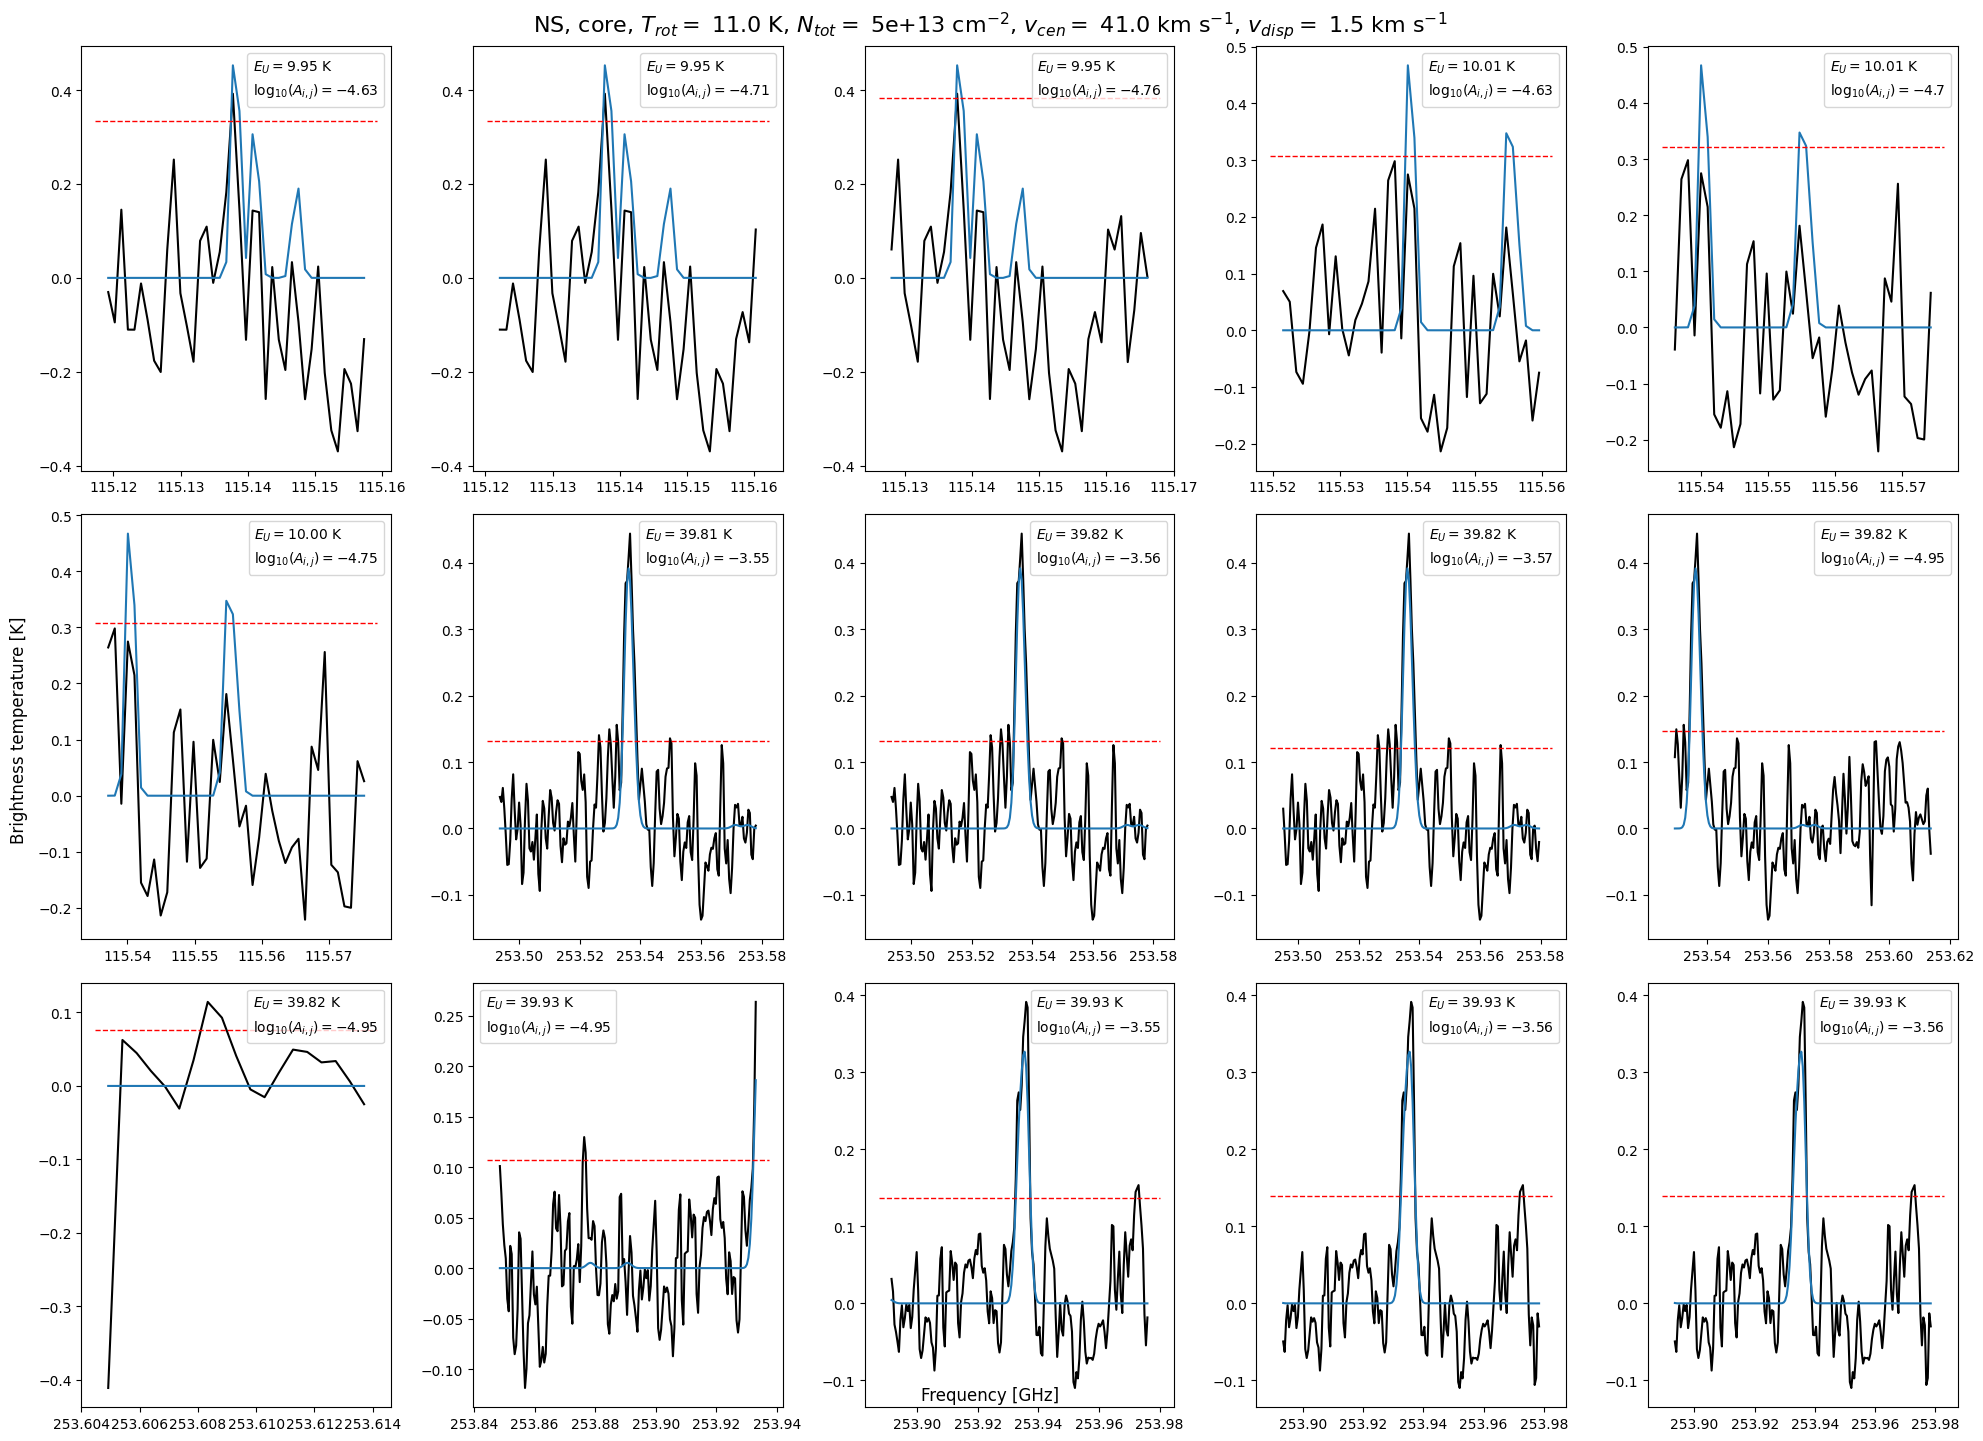

In [19]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 11., N_tot = 5.0e+13, v_cen = 41.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
               nrows=3, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=f'NS', extr_type="coord", crd=crd, 
               show_2_sigma=True)

In [14]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

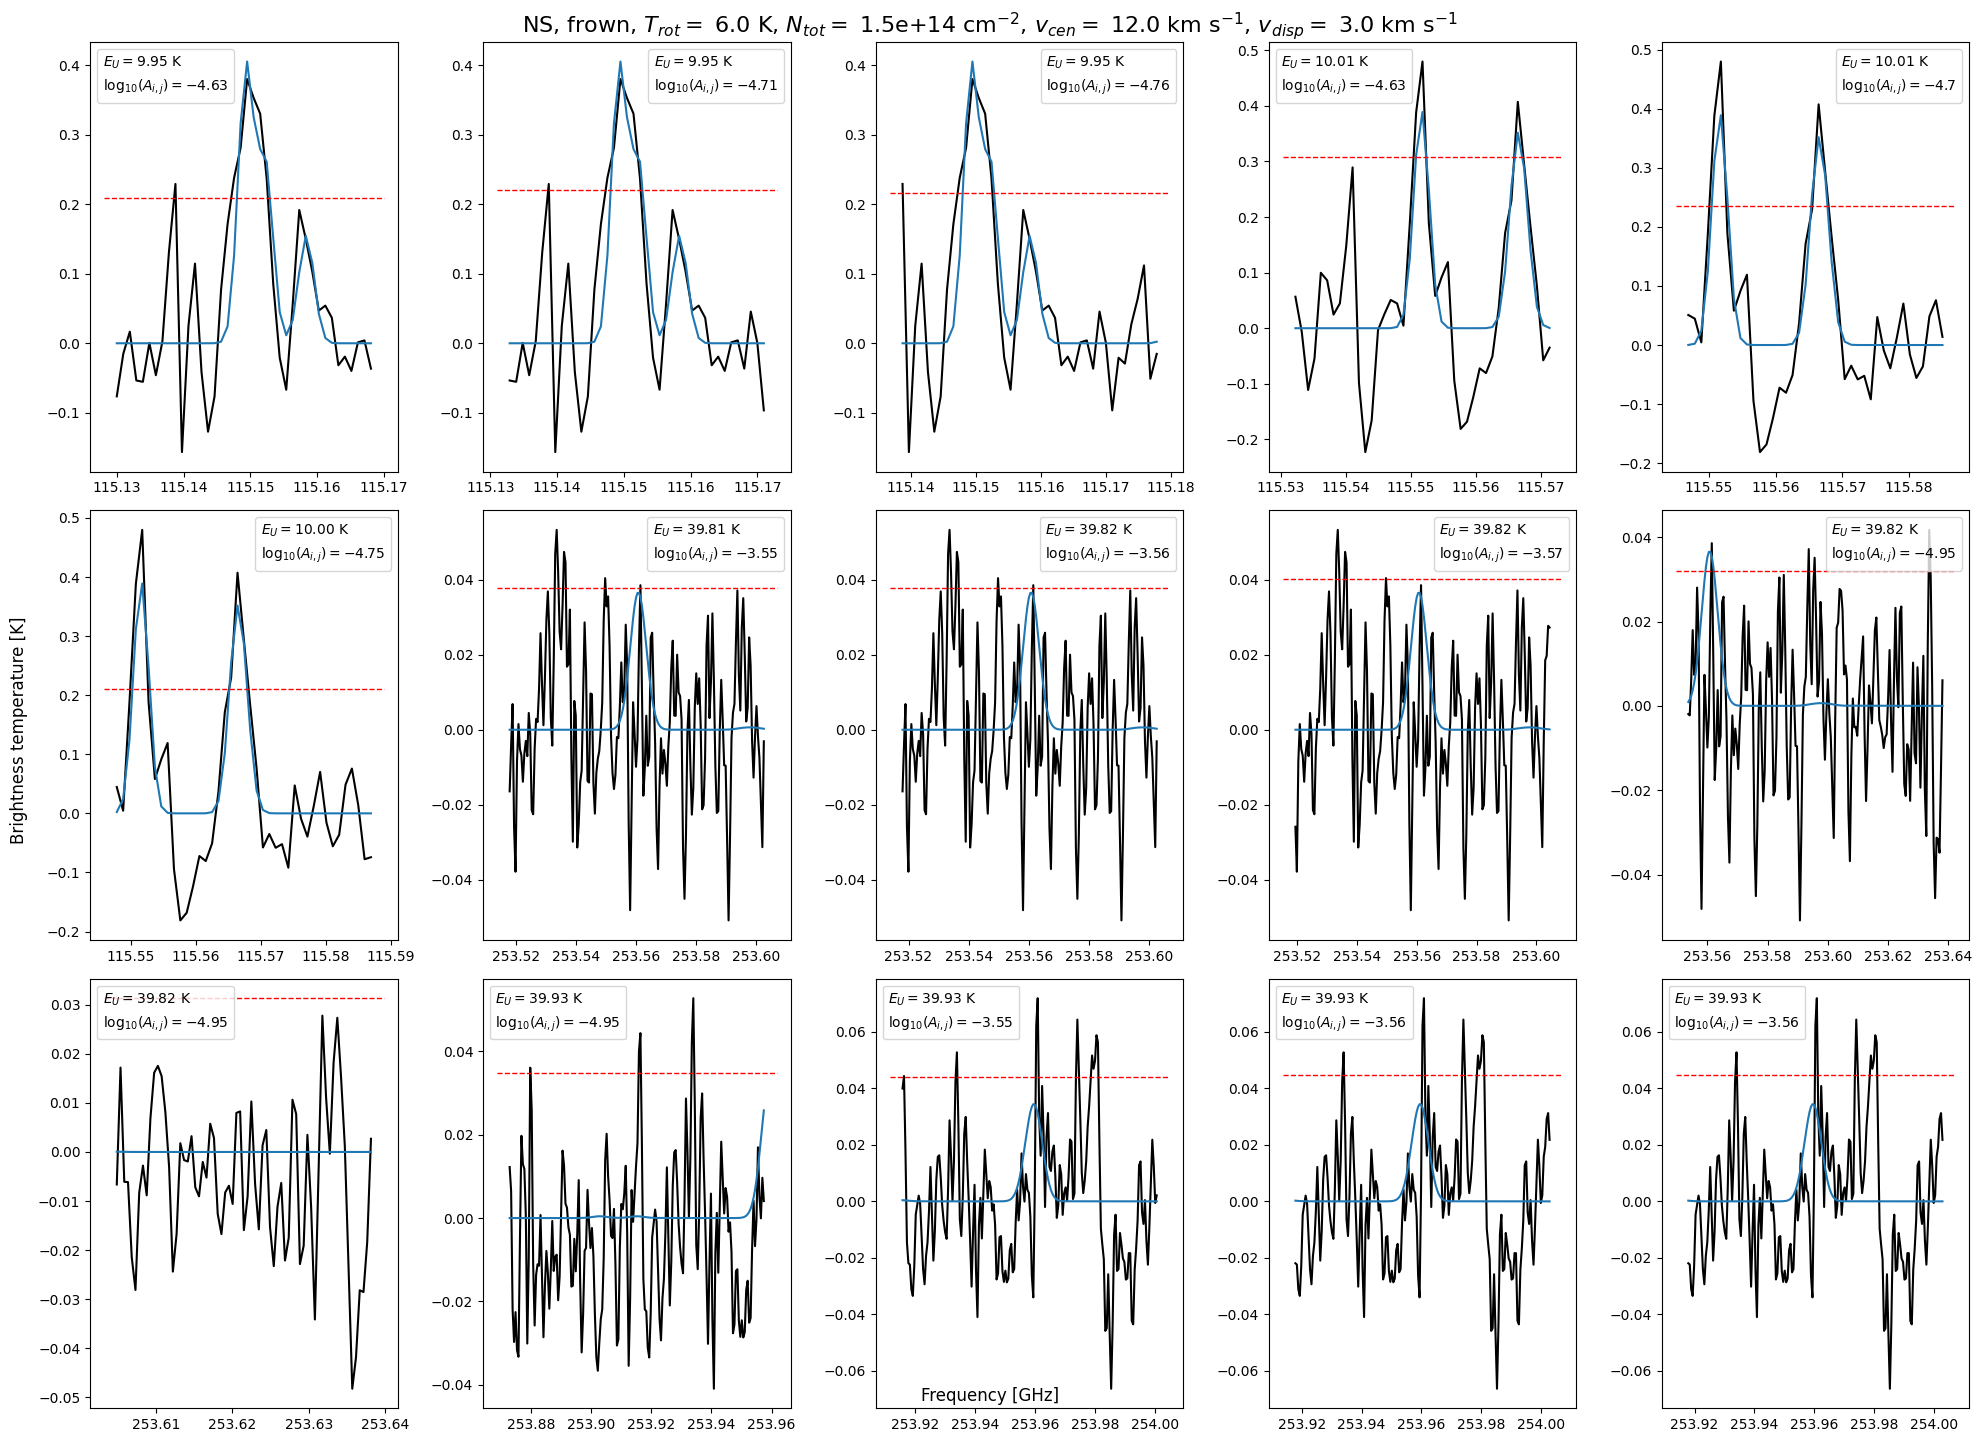

In [20]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 6., N_tot = 1.5e+14, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
                       nrows=3, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=f'NS', extr_type="reg",
                       show_2_sigma=True, return_freqs=True)

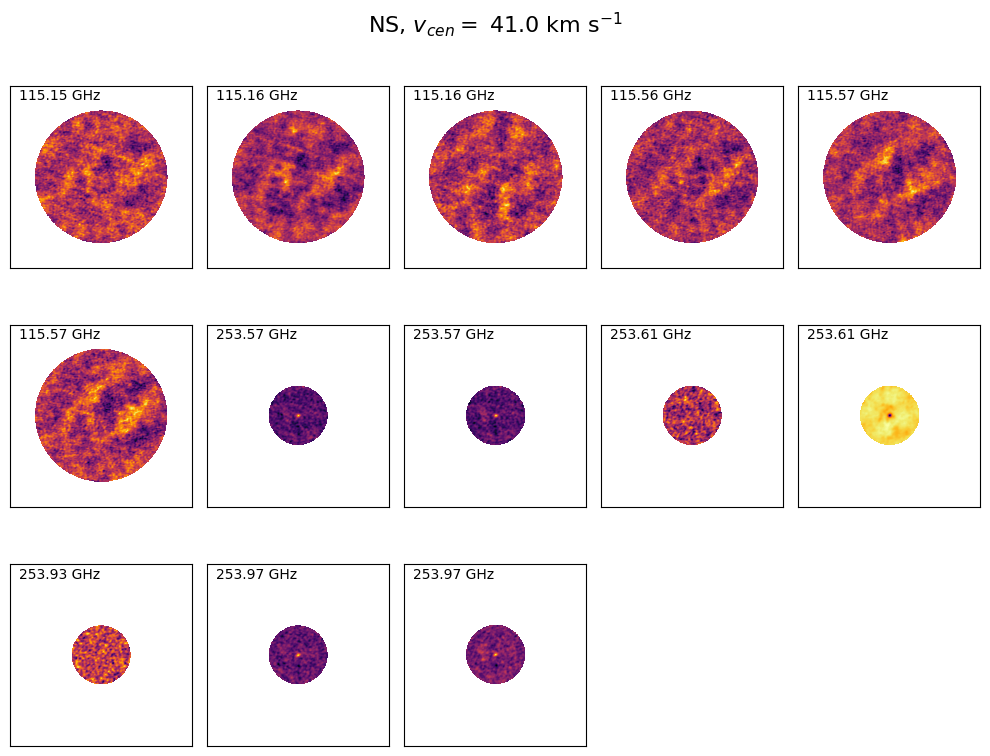

In [16]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=41*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=5, name_for_plot=f'NS')

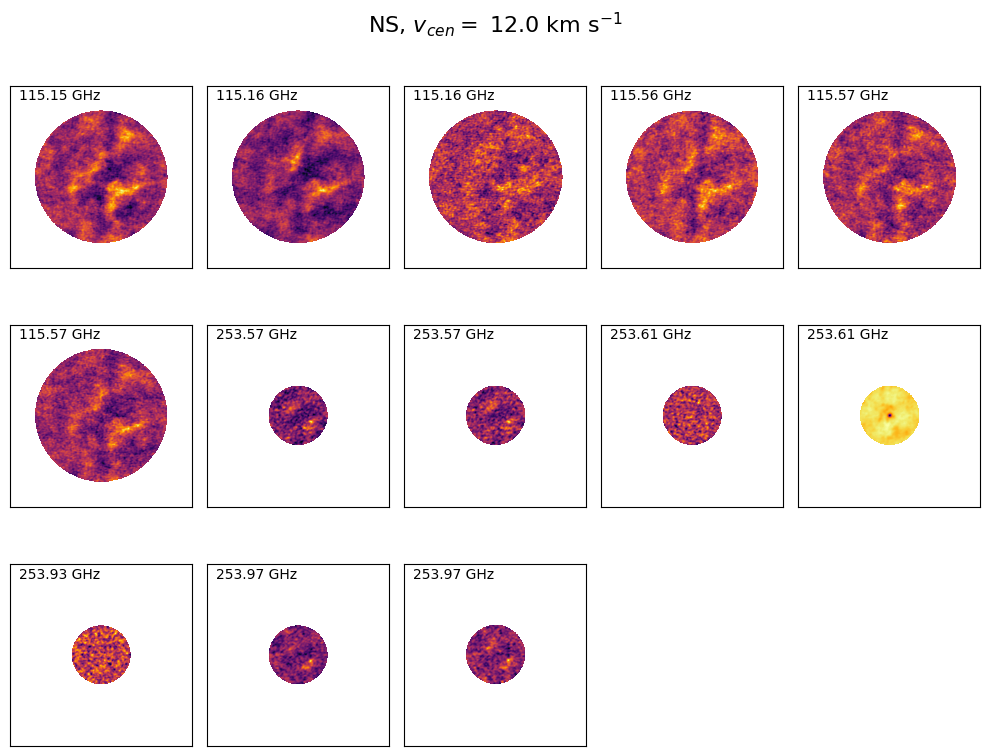

In [17]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=5, name_for_plot=f'NS')